# TP2:  FDMS  Régularisation $L_1(\theta)$, $L_2(\theta)$, $\lambda L_1(\theta) + \lambda L_2(\theta)$
### de Bézenac Emmanuel

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data : Boston House Prices dataset
### loading

In [14]:
from sklearn import datasets
boston = datasets.load_boston()
features = np.array(['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### analysis

In [15]:
import pandas as pd
d_data = pd.DataFrame(boston.data)
d_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [16]:
d_target = pd.DataFrame(boston.target)
d_target.describe()

,0
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


### preprocessing 

In [17]:
#renormalizing
X = boston.data
y = boston.target
X = (X-X.mean(axis=0))/X.std(axis=0)
y = (y-y.mean())/y.std()
pd.DataFrame(X).describe()
#pd.DataFrame(y).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,6.340997e-17,-6.343191e-16,-2.682911e-15,4.701992e-16,2.490322e-15,-1.145230e-14,-1.407855e-15,9.210902e-16,5.441409e-16,-8.868619e-16,-9.205636e-15,8.163101e-15,-3.370163e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.177134e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.088961e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.885818e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,6.248255e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.941735e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


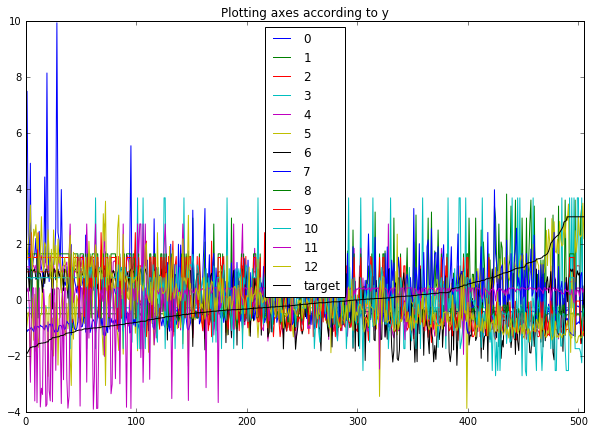

In [18]:
df = pd.DataFrame(X, columns=range(X.shape[1]))
df['target'] = y
df.sort_values('target').reset_index(drop=True).plot(title='Plotting axes according to y', figsize=(10,7))

## Abstract model class

In [19]:
from sklearn.base import BaseEstimator

class Regressor(BaseEstimator):
    def __init__(self):
        print('initialiasing...')
        
    def fit(self, X, y):
        print('fitting...')
        
    def predict(self, X):
        print("predicting...")
        
    def score(self, X, y, metric = 'mean_square_error'):
        y_hat = self.f(X)
        if metric == 'mean_square_error':
            return np.mean((y-y_hat)**2)
        if metric == 'linear_correlation': #computes pearson linear correlation            
            return np.sum((y_hat-y_hat.mean())*(y-y.mean()))/(np.sum((y_hat-y_hat.mean())**2)*np.sum((y-y.mean())**2))        
        if metric == 'coeff_determination': #compute coefficient of determination
            return 1-np.sum((y_hat-y)**2)/np.sum((y-y.mean())**2)
        return None

## Simple Linear Regressor

In [20]:
class LinearRegressor(Regressor):
    def __init__(self, max_iter=5, eps=1e-3, print_every=1):

        self.max_iter = max_iter
        self.eps = eps
        self.print_every = print_every
        self.W = np.random.randn(X.shape[1])
    
    def fit(self, X, y):
        for epoch in xrange(self.max_iter):
            
            if self.print_every != -1 and epoch%self.print_every == 0:
                print('epoch = '+str(epoch)+', loss = '+str(self.score(X, y)))
            
            #parameter update
            self.W -= self.eps*self.grad(X, y)
        if self.print_every != -1:
            print('epoch = '+str(epoch+1)+', loss = '+str(self.score(X, y)))
        
    def predict(self, X):
        return self.f(X)
    
    def f(self, X):
        return X.dot(self.W)
    
    def grad(self, X, y):
        n = X.shape[0]
        return (-2./n)*X.T.dot(y-self.f(X))


In [21]:
r = LinearRegressor(print_every=100, max_iter=400, eps=1e-2)
r.fit(X, y)

epoch = 0, loss = 10.7765546572
epoch = 100, loss = 0.90360254079
epoch = 200, loss = 0.512167850869
epoch = 300, loss = 0.422674347769
epoch = 400, loss = 0.376734319367


## $L_1(\theta)$ Linear Regressor

In [22]:
class SparseLinearRegressor(LinearRegressor):
    
    def __init__(self, max_iter=100, eps=1e-3, lam=1e-3, regularize_every=1, print_every=-1):
        self.max_iter = max_iter
        self.print_every = print_every
        self.eps = eps
        self.regularize_every = regularize_every
        self.lam = lam
        self.W = np.random.randn(X.shape[1])

    def reg_grad(self):
        return self.lam*(np.array(self.W>0, dtype=float) - np.array(self.W<0, dtype=float))
    

    def fit(self, X, y):
        
        for epoch in xrange(self.max_iter):
            
            #evaluating
            if self.print_every != -1 and epoch%self.print_every == 0:
                print('epoch = '+str(epoch)+', loss = '+str(self.score(X, y))\
                    +',  params_norm = '+str(np.sum(np.abs(self.W)))\
                    +', null_params = '+str((self.W==0).sum()))
            
            # normal parameter update
            self.W = self.W - self.eps*self.grad(X, y)
            
            #parameter update for regularizer
            if epoch%self.regularize_every == 0:
                nW = self.W - self.eps*self.reg_grad()
                nW[self.W*nW<0] = 0 #gradient clipping
                self.W = nW
        
        if self.print_every != -1:
            print('epoch = '+str(epoch+1)+', loss = '+str(self.score(X, y))\
                +',  params_norm = '+str(np.sum(np.abs(self.W)))\
                +', null_params = '+str((self.W==0).sum()))

### fitting

In [23]:
sr = SparseLinearRegressor(eps=1e-2, regularize_every=1, print_every=100, max_iter = 400, lam=.01)
sr.fit(X, y)

epoch = 0, loss = 3.69126558027,  params_norm = 6.75918440128, null_params = 0
epoch = 100, loss = 0.705512258433,  params_norm = 3.48050919861, null_params = 0
epoch = 200, loss = 0.43287320925,  params_norm = 2.56384598471, null_params = 0
epoch = 300, loss = 0.338988821193,  params_norm = 2.0225374827, null_params = 0
epoch = 400, loss = 0.298131685772,  params_norm = 1.91602541983, null_params = 0


### cross-validation

In [24]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn import cross_validation

mse = make_scorer(mean_squared_error, greater_is_better=True)
sr = SparseLinearRegressor(eps=1e-2, regularize_every=1, print_every=-1, max_iter = 400, lam=.01)
cross_validation.cross_val_score(sr, X, y, cv=5, scoring=mse)

array([ 0.18018479,  0.34928205,  0.62501478,  1.21498443,  0.30419979])

### printing various metrics and feature weights

In [25]:
sr = SparseLinearRegressor(eps=5e-2, regularize_every=1, print_every=-1, max_iter = 2000, lam=1e-2)
sr.fit(X, y)
x = sr.predict(X)

print ''
print 'mean square error : '
print sr.score(X, y, metric='mean_square_error')
print 'pearson linear correlation :'
print sr.score(X, y, metric='linear_correlation')
print 'coefficient of determination :'
print sr.score(X, y, metric='coeff_determination')

print '\nfeature weights and associated values:'
print np.abs(sr.W).argsort()[::-1]
print features[np.abs(sr.W).argsort()[::-1]]
print sr.W[np.abs(sr.W).argsort()[::-1]]


mean square error : 
0.260565932531
pearson linear correlation :
0.00200575810709
coefficient of determination :
0.739434067469

feature weights and associated values:
[12  7  5 10  8  4  9  1 11  0  3  6  2]
['MEDV' 'RAD' 'AGE' 'B' 'TAX' 'RM' 'PTRATIO' 'INDUS' 'LSTAT' 'ZN' 'NOX'
 'DIS' 'CHAS']
[-0.40606789 -0.30598877  0.29798833 -0.2166986   0.21276367 -0.19728562
 -0.15883986  0.09818023  0.08866458 -0.08563966  0.07352941  0.          0.        ]


### Grid Search

In [26]:
from sklearn.grid_search import GridSearchCV

parameter_grid = {
    'eps':[1e-1, 1e-2, 1e-3],
    'max_iter':[200, 400, 800],#, 1200],
    'regularize_every':range(1, 20, 1),
    'lam':np.linspace(0, 6, 20),
}

grid_search = GridSearchCV(SparseLinearRegressor(print_every=-1), parameter_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=SparseLinearRegressor(eps=0.001, lam=0.001, max_iter=100, print_every=-1,
           regularize_every=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'lam': array([ 0.     ,  0.31579,  0.63158,  0.94737,  1.26316,  1.57895,
        1.89474,  2.21053,  2.52632,  2.84211,  3.15789,  3.47368,
        3.78947,  4.10526,  4.42105,  4.73684,  5.05263,  5.36842,
        5.68421,  6.     ]), 'regularize_every': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'max_iter': [200, 400, 800], 'eps': [0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [27]:
def project_grid_scores(grid_scores, axis='lam'):
    # groups scores according to axis and aggregates
    # the the values according to a minima pooling
    best = {}
    for s in grid_scores:
        axis_value = s[0][axis]
        if axis_value not in best:
            best[axis_value] = s
        elif best[axis_value].mean_validation_score > s.mean_validation_score :
            best[axis_value] = s
    return best.values()

best parameters:
mean: 0.32888, std: 0.14650, params: {'lam': 1.263157894736842, 'regularize_every': 5, 'max_iter': 200, 'eps': 0.01}


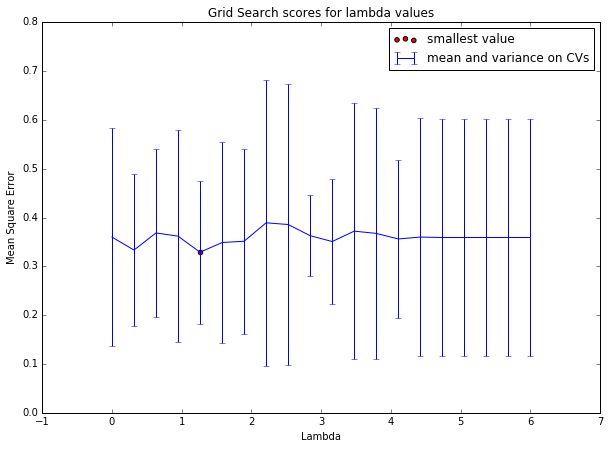

In [28]:
results = project_grid_scores(grid_search.grid_scores_)
results = sorted(results, key=lambda x:x[0]['lam'])

mean = np.array([r[1] for r in results])
std = np.array([r[2].std() for r in results])

print 'best parameters:'
print results[mean.argmin()]

#plotting
plt.figure(figsize=(10, 7))
plt.title('Grid Search scores for lambda values')
p_x = grid_search.param_grid['lam']
p_y = mean
p_y_err = std
plt.errorbar(p_x, p_y, p_y_err, label='mean and variance on CVs')
plt.scatter([p_x[p_y.argmin()]], p_y.min(), c='r', label='smallest value')
plt.xlabel('Lambda')
plt.ylabel('Mean Square Error')
plt.legend()

## $L_2(\theta)$ Regressor

In [110]:
class L2LinearRegressor(SparseLinearRegressor):
    
    def reg_grad(self):
        return -self.lam*self.W

## $\lambda_1 L_1(\theta)+ \lambda_2 L_2(\theta)$ Regressor

In [116]:
class L1L2LinearRegressor(SparseLinearRegressor):
    
    def reg_grad(self):
        l1_grad = np.array(self.W>0, dtype=float) - np.array(self.W<0, dtype=float)
        l2_grad = -self.W
        return self.lam[0]*l1_grad + self.lam[1]*l2_grad

## Tests

In [131]:
print 'L1 regressor'
slr = SparseLinearRegressor(max_iter=1000, print_every=100, lam=1)
print slr.get_params()
slr.fit(X, y)

print ''
print 'L2 regressor'
l2lr = L2LinearRegressor(max_iter=1000, print_every=100, lam=1)
print l2lr.get_params()
l2lr.fit(X, y)

print ''
print 'L1 L2 regressor'
l1l2lr = L1L2LinearRegressor(max_iter=1000, print_every=100, lam=(.5, .5))
print l1l2lr.get_params()
l1l2lr.fit(X, y)

from sklearn import linear_model
lasso = linear_model.Lasso(alpha=.5, tol=1, max_iter=1000)
lasso.fit(X, y)

print ''
print 'coefficient of determination (r2_score)'
print slr.score(X, y, metric='coeff_determination')
print l2lr.score(X, y, metric='coeff_determination')
print l1l2lr.score(X, y, metric='coeff_determination')
print lasso.score(X, y)

L1 regressor
{'regularize_every': 1, 'lam': 1, 'print_every': 100, 'max_iter': 1000, 'eps': 0.001}
epoch = 0, loss = 10.4976748746,  params_norm = 8.89135712665, null_params = 0
epoch = 100, loss = 3.00664741505,  params_norm = 6.4652748831, null_params = 0
epoch = 200, loss = 1.572590749,  params_norm = 4.77751426051, null_params = 2
epoch = 300, loss = 0.908042316743,  params_norm = 3.35552583666, null_params = 3
epoch = 400, loss = 0.575268962384,  params_norm = 2.17437584962, null_params = 4
epoch = 500, loss = 0.443753419843,  params_norm = 1.29733257248, null_params = 6
epoch = 600, loss = 0.436603161078,  params_norm = 0.80540613886, null_params = 9
epoch = 700, loss = 0.487833190979,  params_norm = 0.55019987582, null_params = 10
epoch = 800, loss = 0.546617031592,  params_norm = 0.437765463372, null_params = 11
epoch = 900, loss = 0.588902073094,  params_norm = 0.375425917752, null_params = 11
epoch = 1000, loss = 0.624572047154,  params_norm = 0.328083397996, null_params = 11

Lorsque l'on utilise le modèle de régression sparse simple, l'on a beaucoup de valeurs nulles, l'on peut observer une norme des paramètres qui est faible. Lorsque que l'on rajoute un terme pour maximiser la norme l2, le la norme devient évidemment plus grande (d'autant plus qu'il peut être enclain à surraprendre), mais le MSE également. Un bon compromis est le troisième modèle, qui essaye de trouver une expliquation sparse des données, tout en rectifiant le coup pour éviter que toutes les valeurs des paramètres soient nulles.

